##  Book Recommendation using Matrix Factorization

#### Dataset url: http://www2.informatik.uni-freiburg.de/~cziegler/BX/

### In the dataset used here, we have 3 tables: books, book ratings and user information. 
- #### 'books' contains information of all the books like ISBN (or book ID), Publisher, Year of Publication, Book Author, Book title and Image_URLs
- #### 'book ratings' contains all the ratings against the given book by the users (ISBN, User-ID, Book-Rating).
- #### 'Users' table contains all User-ID, Age and Location.

In [1]:
import numpy as np
import pandas as pd
import math
import warnings
warnings.filterwarnings('ignore')

#### In matrix_factorization function, we are using gradient descend method to minimize the difference between the product of P and Q and our original sparse rating matrix R.
- #### P represents the user-latent_feature matrix which gives us an idea of the strength of association between a user and a latent feature. So, here the rows represent users and columns represent the latent feature.
- #### Q represents the latent_feature-book matrix which gives the strength of association between a book and that latent feature.
- #### K is no. of latent features.
- #### Here the association between a user and latent feature for instance, could mean for how much that user likes a genre of the book. Latent features might include for example: horror, romance, adult fiction, non-fiction.
- #### Association b/w a book and latent feature for instance, could describe the genre the book belongs to.
- #### alpha represents learning rate
- #### epochs represents the no. of iterations.
- #### beta here is the regularization constant
- #### error threshold gives us a breaking condition where any errors around error threshold are acceptable and would cause the code to break out of the loop.

#### Working:
- #### Initialize the matrix P and Q with dimensions (N by k) and (k by M) respectively with numbers between 0 and 1. 
- #### At each epoch, it calculates the difference (for a non-null value R[i][j]) between R[i][j] and the product of the row of P and column of Q. This difference is stored as error eij. 
- #### eij is used to update P[i][k] and Q[k][j] for k = 1 to K
- #### At the end of each epoch, we calculate the error and compare it with error threshold. The loop breaks if error comes out less than the error threshold.

In [2]:
def find_error(n, m, K, R, P, Q, beta):
    error = 0
    for r in range(n):
        for c in range(m):
            if np.isnan(R[r][c])==False:
                error+=(R[r][c]-np.dot(P[r, :], Q[:, c]))**2
                reg_term = 0
                for k in range(K):
                    reg_term+=(P[r][k]**2 + Q[k][c]**2)
                reg_term//=2
                error+=(reg_term*beta)
            
    return error

In [3]:
def matrix_factorization(P, Q, n, m, R, K, epochs, alpha, beta, error_threshold):
    error = 0
    for epoch in range(epochs):
        for r in range(n):
            for c in range(m):
                eij = 0
                if np.isnan(R[r][c])==False:
                    eij = R[r][c]-np.dot(P[r,:],Q[:,c])
                    for k in range(K):
                        P[r][k] = P[r][k] + 2*alpha*(eij*Q[k][c] - beta*P[r][k])
                        Q[k][c] = Q[k][c] + 2*alpha*(eij*P[r][k] - beta*Q[k][c])
        error = find_error(n, m , K, R, P, Q, beta)
        if error<error_threshold:
            break
    return P,Q,error

In [4]:
R = np.array([[5,3,np.NaN,1],
     [4,np.NaN,np.NaN,1],
     [1,1,np.NaN,5],
     [1,np.NaN,np.NaN,4],
     [np.NaN,1,5,4]])

n = R.shape[0]
m = R.shape[1]
k = 2
P = np.random.rand(n,k)
Q = np.random.rand(k,m)
nP, nQ, error = matrix_factorization(P, Q, n, m, R, k, 5000, 0.01, 0.02, 0.01)
nR = np.dot(nP, nQ)
print(error)
nR

0.9894604677391171


array([[4.95355669, 2.96648029, 1.96803631, 1.00266084],
       [3.96321293, 2.38983088, 1.81151052, 0.99912977],
       [1.00158832, 0.99552114, 6.10565363, 4.94665647],
       [0.99777712, 0.91173332, 4.92850789, 3.96876977],
       [1.14557639, 0.9991967 , 4.97211917, 3.98612844]])

#### First thing we want to do is to remove information which is not required for predicting the rating against a book for a given user. This includes removal of image_urls, Year of Publication, Book Author, Publisher from the books dataframe. 
#### From the users_info dataframe created from 'Users.csv', the location of each user is split using comma as a separator and then only the last part is picked to create a new column "Country". We then proceed to delete the "Age" and "Location" columns from this dataframe.
#### Inorder to make some of the Country names consistent (here, only USA and India names are made consistent), we first find out a list of strings which mean to represent USA and India countries. Then we replace those strings with 'usa' and 'india' to make them consistent.

In [5]:
books = pd.read_csv('BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
book_ratings = pd.read_csv('BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users_info = pd.read_csv('BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [6]:
print("Total no. of books: ", books['ISBN'].unique().shape)
books.head()

Total no. of books:  (271360,)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [7]:
book_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [8]:
users_info.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [9]:
users_info['Country'] = users_info['Location'].str.split(',').str[-1]
users_info['Country'] = users_info['Country'].str.strip()

In [10]:
users_info = users_info.drop(columns=['Age', 'Location'], axis=1)

In [11]:
Countries = list(users_info['Country'].unique().astype(str))
Countries.sort()

In [12]:
# Countries

In [13]:
# import re 
# usa_strings = list()

# for i in range(users_info['Country'].count()):
#     if re.search('^u.*s.*', users_info['Country'][i]) and users_info['Country'][i] not in usa_strings and users_info['Country'][i]!='uzbekistan':
#         usa_strings.append(users_info['Country'][i])

# usa_strings

In [14]:
india_strings = ['in','india','india"','indiai']
usa_strings = ['america','u.s. of a.', 'u.s. virgin islands', 'u.s.a!', 'u.s.a.', 'u.s.a>', 'u.s>','unite states', 'united sates', 'united staes', 'united state', 'united statea', 'united stated', 'united stated of america','united states','united states of america', 'us', 'usa', 'usa & canada', 'usa (currently living in england)', 'usa"', 'ussurfing', 'ust', 'uusa','wonderful usa']
users_info['Country'] = users_info['Country'].replace(to_replace = usa_strings, value="usa")
users_info['Country'] = users_info['Country'].replace(to_replace = india_strings, value="india")

In [15]:
users_info.head()

,User-ID,Country
0,1,usa
1,2,usa
2,3,russia
3,4,portugal
4,5,united kingdom


In [16]:
books = books.drop(columns = ['Image-URL-S', 'Image-URL-M', 'Image-URL-L','Publisher','Year-Of-Publication', 'Book-Author'])
books.head(4)

,ISBN,Book-Title
0,0195153448,Classical Mythology
1,0002005018,Clara Callan
2,0060973129,Decision in Normandy
3,0374157065,Flu: The Story of the Great Influenza Pandemic...


#### Next we merge 'books' dataframe with 'book_ratings' dataframe on the common ISBN(or book IDs) and then this result is merged with the 'users_info' dataframe based on the common User-IDs inorder to include the Country column in it corresponding to the User-IDs.
#### This resultant includes columns: ISBN, Book-Title, Book-Rating, and Country. These are part of 'combined_book_ratings' dataframe
#### Then, we find the count of the users who have given ratings on each book store this information in a new dataframe 'book_total_rating_count'. These values are stored under the column 'TotalNoOfRatings'
#### We also merge 'combined_book_ratings' with 'book_total_rating_count' on the common ISBN values between them inorder to include the User-ID and Country of the users as well as their corresponding ratings w.r.t to that particular book. The merging is stored in the dataframe 'final_df'.

In [17]:
combined_book_ratings = pd.merge(books, book_ratings, how='right', on='ISBN')
combined_book_ratings = pd.merge(combined_book_ratings, users_info, on='User-ID')
combined_book_ratings.head()

,ISBN,Book-Title,User-ID,Book-Rating,Country
0,0195153448,Classical Mythology,2,0,usa
1,0002005018,Clara Callan,8,5,canada
2,0060973129,Decision in Normandy,8,0,canada
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,8,0,canada
4,0393045218,The Mummies of Urumchi,8,0,canada


#### Upon assigning a df['Total_rating_count'] with df.groupby('Book-Title')['Book-Rating'].count(), for some reason the count values all show up to be NaN. But the code snippet below works.
#### Our aim here is that for a given book we are supposed to find the number of ratings and store it in the column 'TotalRatingCount'. 

In [18]:
book_total_rating_count = combined_book_ratings.groupby('ISBN')['Book-Rating'].count().to_frame()
book_total_rating_count = book_total_rating_count.reset_index()

In [19]:
book_total_rating_count = book_total_rating_count.rename({'Book-Rating': 'totalNoOfRatings'}, axis='columns')
book_total_rating_count.columns

Index(['ISBN', 'totalNoOfRatings'], dtype='object')

In [20]:
final_df = pd.merge(combined_book_ratings, book_total_rating_count, on='ISBN')
final_df = final_df.drop(columns = ['Book-Title'])
final_df

,ISBN,User-ID,Book-Rating,Country,totalNoOfRatings
0,0195153448,2,0,usa,1
1,0002005018,8,5,canada,14
2,0002005018,11400,0,canada,14
3,0002005018,11676,8,n/a,14
4,0002005018,41385,0,canada,14
...,...,...,...,...,...
1149775,8886661975,276448,10,italy,1
1149776,7222025634,276638,10,china,1
1149777,0533233661,276663,5,spain,1
1149778,3423120754,276668,8,germany,1


In [21]:
#book_total_rating_count['totalNoOfRatings'].quantile(np.arange(0.75,1,0.01))

In [22]:
book_total_rating_count['totalNoOfRatings'].describe()

count    340556.000000
mean          3.376185
std          12.436252
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max        2502.000000
Name: totalNoOfRatings, dtype: float64

### Next we want to generate a User-Item Rating matrix where User-ID is our index and ISBN values are columns. To create this we need:
- #### First query out the rows from our final_df dataframe where the TotalNoOfRatings is greater than or equal to 500. 
- #### Then we query out the rows where the user belongs to 'USA' and store it in popular_books_df_us. 
- #### From this result we drop out the columns 'Country' and 'totalNoOfRatings' and then create 'User-ID' as our index and ISBN values as our column. This is stored in 'rating_matrix_df' which is then converted into a numpy array.
- #### Then we apply our matrix factorization function and it returns the 'users-latent features' matrix P, 'latent features-items' Q and the errors calculated after the iterations are finished.

In [23]:
popular_books_df = final_df[final_df['totalNoOfRatings']>=500]

In [24]:
popular_books_df_us = popular_books_df.loc[(popular_books_df['Country'] == 'usa')]
#| (popular_books_df['Country'] == 'india') | 

In [25]:
popular_books_df_us

,ISBN,User-ID,Book-Rating,Country,totalNoOfRatings
1176,0312195516,110912,9,usa,723
1177,0312195516,137688,0,usa,723
1178,0312195516,29526,10,usa,723
1179,0312195516,46398,0,usa,723
1180,0312195516,113519,9,usa,723
...,...,...,...,...,...
298709,0679781587,255444,10,usa,639
298710,0679781587,256821,0,usa,639
298712,0679781587,268038,7,usa,639
298713,0679781587,269017,7,usa,639


In [26]:
rating_matrix_df = popular_books_df_us.copy()
rating_matrix_df.drop(columns = ['totalNoOfRatings', 'Country'])

,ISBN,User-ID,Book-Rating
1176,0312195516,110912,9
1177,0312195516,137688,0
1178,0312195516,29526,10
1179,0312195516,46398,0
1180,0312195516,113519,9
...,...,...,...
298709,0679781587,255444,10
298710,0679781587,256821,0
298712,0679781587,268038,7
298713,0679781587,269017,7


In [27]:
rating_matrix_df = rating_matrix_df.set_index('User-ID')
rating_matrix_df = rating_matrix_df.pivot(index = rating_matrix_df.index, columns='ISBN')['Book-Rating']

In [28]:
rating_matrix_df

ISBN,0060928336,0142001740,0312195516,0316601950,0316666343,0345337662,0375727345,0385504209,044021145X,0440211727,0440214041,044023722X,0446672211,0452282152,059035342X,0671027360,067976402X,0679781587,0804106304,0971880107
User-ID,,,,,,,,,,,,,,,,,,,,
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
243,NaN,NaN,NaN,9.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,7.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
254,NaN,9.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,8.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN
278514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
278633,NaN,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#####  Some observations were that with learning rate = 0.02 the new_rating_matrix was giving me all NaN matrix. A smaller learning rate like 0.001 is more suitable for this instance. More testing on this is required

In [29]:
rating_matrix = rating_matrix_df.to_numpy()[:300]

#### The line below determines how many values are null out of 6000 values of our rating matrix

In [30]:
np.count_nonzero(np.isnan(rating_matrix))

5443

In [31]:
rating_matrix

array([[nan, nan, nan, ..., nan, nan,  0.],
       [nan, nan, nan, ..., nan,  0., nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ...,  0., nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan,  0.]])

In [32]:
n = rating_matrix.shape[0]
m = rating_matrix.shape[1]
matrices = []
errors = []

#### An error vs k graph is plotted using scatter plot from matplotlib.

In [33]:
for k in range(1, 20):
    P = np.random.rand(n,k)
    Q = np.random.rand(k,m)
    nP, nQ, error = matrix_factorization(P, Q, n, m, rating_matrix, k, 5000, 0.001, 0.02, 0.01)
    print(f"k = {k}, Done")
    errors.append(error)
    new_rating_matrix = np.dot(nP, nQ)
    matrices.append(new_rating_matrix)

k = 1, Done
k = 2, Done
k = 3, Done
k = 4, Done
k = 5, Done
k = 6, Done
k = 7, Done
k = 8, Done
k = 9, Done
k = 10, Done
k = 11, Done
k = 12, Done
k = 13, Done
k = 14, Done
k = 15, Done
k = 16, Done
k = 17, Done
k = 18, Done
k = 19, Done


In [34]:
print(errors)

[3463.3687832996525, 1835.5413742182755, 613.5612613134347, 231.45769961799607, 119.2463165952303, 103.94164658446502, 99.44381108918766, 98.17502338504403, 98.36887058767306, 98.29014157812439, 97.64750190712681, 99.2434503368161, 98.76467199757757, 98.48628177869088, 98.34424369183573, 99.45339163520663, 99.53336865509446, 100.01794063165171, 100.40514185927942]


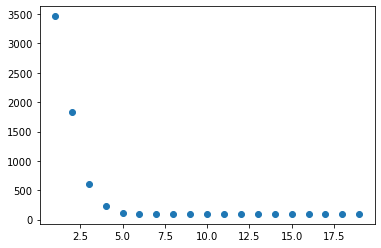

In [38]:
import matplotlib.pyplot as plt
xaxis = list(np.arange(1,len(errors)+1))
plt.scatter(xaxis, errors)

In [39]:
k=1
for matrix in matrices:
    print(f'With No. of Latent Features = {k}')
    print(np.round(matrix), end='\n\n\n')
    k+=1

With No. of Latent Features = 1
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 [12. 15.  9. ... 13.  7.  2.]
 ...
 [ 0.  0.  0. ...  0.  0.  0.]
 [ 7.  8.  5. ...  7.  4.  1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


With No. of Latent Features = 2
[[ 0.  0.  0. ...  0.  0.  0.]
 [ 1. -1.  0. ...  1. -0.  0.]
 [11.  9. 14. ... 12. 12.  2.]
 ...
 [ 0.  3.  2. ...  0.  2. -0.]
 [ 2. 54. 43. ... -1. 39. -1.]
 [ 0.  0.  0. ...  0.  0.  0.]]


With No. of Latent Features = 3
[[ 2.  3.  1. ...  2.  3. -0.]
 [ 1.  1.  0. ...  1.  0. -0.]
 [ 8. 10.  6. ...  7. 13.  1.]
 ...
 [ 1.  2.  2. ... -0.  3.  0.]
 [ 6. 11.  7. ...  3. 12. -2.]
 [ 1.  2.  2. ...  0.  3. -0.]]


With No. of Latent Features = 4
[[ 2.  3.  2. ...  3.  2. -0.]
 [ 1.  2.  1. ...  1. -0. -1.]
 [ 6.  6.  9. ...  7. 10.  2.]
 ...
 [ 1.  1.  0. ... -0.  1.  0.]
 [ 4.  1.  7. ...  1. 12.  4.]
 [ 2.  3.  2. ...  3.  2. -0.]]


With No. of Latent Features = 5
[[ 0.  2.  2. ...  2. -0.  0.]
 [ 0.  2.  1. ...  3. -0.  0.]
 [